# Visualizing Earnings Based On College Majors

In this project, we'll be working with a dataset on the job outcomes of students who graduated from college between 2010 and 2012. The original data on job outcomes was released by [American Community Survey](https://www.census.gov/programs-surveys/acs/), which conducts surveys and aggregates the data. FiveThirtyEight cleaned the dataset and released it on their [Github repo](https://github.com/fivethirtyeight/data/tree/master/college-majors).

Each row in the dataset represents a different major in college and contains information on gender diversity, employment rates, median salaries, and more. Here are some of the columns in the dataset:

- Rank - Rank by median earnings (the dataset is ordered by this column).
- Major_code - Major code.
- Major - Major description.
- Major_category - Category of major.
- Total - Total number of people with major.
- Sample_size - Sample size (unweighted) of full-time.
- Men - Male graduates.
- Women - Female graduates.
- ShareWomen - Women as share of total.
- Employed - Number employed.
- Median - Median salary of full-time, year-round workers.
- Low_wage_jobs - Number in low-wage service jobs.
- Full_time - Number employed 35 hours or more.
- Part_time - Number employed less than 35 hours.

The aim of this project is to explore the data using visualizations techniques.

## Dataset Description

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

recent_grads = pd.read_csv('recent-grads.csv')
first_row = recent_grads.iloc[0]
recent_grads.info()
recent_grads_head = recent_grads.head()
recent_grads_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 21 columns):
Rank                    173 non-null int64
Major_code              173 non-null int64
Major                   173 non-null object
Total                   172 non-null float64
Men                     172 non-null float64
Women                   172 non-null float64
Major_category          173 non-null object
ShareWomen              172 non-null float64
Sample_size             173 non-null int64
Employed                173 non-null int64
Full_time               173 non-null int64
Part_time               173 non-null int64
Full_time_year_round    173 non-null int64
Unemployed              173 non-null int64
Unemployment_rate       173 non-null float64
Median                  173 non-null int64
P25th                   173 non-null int64
P75th                   173 non-null int64
College_jobs            173 non-null int64
Non_college_jobs        173 non-null int64
Low_wage_jobs          

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


In [2]:
recent_grads_tail = recent_grads.tail()
recent_grads_tail

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
168,169,3609,ZOOLOGY,8409.0,3050.0,5359.0,Biology & Life Science,0.637293,47,6259,...,2190,3602,304,0.046320,26000,20000,39000,2771,2947,743
169,170,5201,EDUCATIONAL PSYCHOLOGY,2854.0,522.0,2332.0,Psychology & Social Work,0.817099,7,2125,...,572,1211,148,0.065112,25000,24000,34000,1488,615,82
170,171,5202,CLINICAL PSYCHOLOGY,2838.0,568.0,2270.0,Psychology & Social Work,0.799859,13,2101,...,648,1293,368,0.149048,25000,25000,40000,986,870,622
171,172,5203,COUNSELING PSYCHOLOGY,4626.0,931.0,3695.0,Psychology & Social Work,0.798746,21,3777,...,965,2738,214,0.053621,23400,19200,26000,2403,1245,308
172,173,3501,LIBRARY SCIENCE,1098.0,134.0,964.0,Education,0.877960,2,742,...,237,410,87,0.104946,22000,20000,22000,288,338,192


## Data Exploration and Cleaning

In this section, we describe the statistical information of the dataset and clean the dataset, dropping the missing values.

In [3]:
recent_grads.describe(include = 'all')

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,173.000000,173.000000,173,172.000000,172.000000,172.000000,173,172.000000,173.000000,173.000000,...,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
unique,NaN,NaN,173,NaN,NaN,NaN,16,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,SOCIAL SCIENCE OR HISTORY TEACHER EDUCATION,NaN,NaN,NaN,Engineering,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,1,NaN,NaN,NaN,29,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,87.000000,3879.815029,NaN,39370.081395,16723.406977,22646.674419,NaN,0.522223,356.080925,31192.763006,...,8832.398844,19694.427746,2416.329480,0.068191,40151.445087,29501.445087,51494.219653,12322.635838,13284.497110,3859.017341
std,50.084928,1687.753140,NaN,63483.491009,28122.433474,41057.330740,NaN,0.231205,618.361022,50675.002241,...,14648.179473,33160.941514,4112.803148,0.030331,11470.181802,9166.005235,14906.279740,21299.868863,23789.655363,6944.998579
min,1.000000,1100.000000,NaN,124.000000,119.000000,0.000000,NaN,0.000000,2.000000,0.000000,...,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.000000,2403.000000,NaN,4549.750000,2177.500000,1778.250000,NaN,0.336026,39.000000,3608.000000,...,1030.000000,2453.000000,304.000000,0.050306,33000.000000,24000.000000,42000.000000,1675.000000,1591.000000,340.000000
50%,87.000000,3608.000000,NaN,15104.000000,5434.000000,8386.500000,NaN,0.534024,130.000000,11797.000000,...,3299.000000,7413.000000,893.000000,0.067961,36000.000000,27000.000000,47000.000000,4390.000000,4595.000000,1231.000000
75%,130.000000,5503.000000,NaN,38909.750000,14631.000000,22553.750000,NaN,0.703299,338.000000,31433.000000,...,9948.000000,16891.000000,2393.000000,0.087557,45000.000000,33000.000000,60000.000000,14444.000000,11783.000000,3466.000000


In [4]:
raw_data_count = recent_grads.shape[0]
print('Number of initial rows in the dataset:', raw_data_count)

recent_grads = recent_grads.dropna()
cleaned_data_count = recent_grads.shape[0]
print('Number of cleaned data rows:', cleaned_data_count)


Number of initial rows in the dataset: 173
Number of cleaned data rows: 172


## Exploring and Visualizing relations between different columns in the dataset

In this section, we will explore the dataset using different kind of plots.

### Visualizing relations using scatter plots
We will use scatter plots to show the relations between the following columns:

- Sample_size and Median
- Sample_size and Unemployment_rate
- Full_time and Median
- ShareWomen and Unemployment_rate
- Men and Median
- Women and Median
- Total and Median

(-100, 5000)

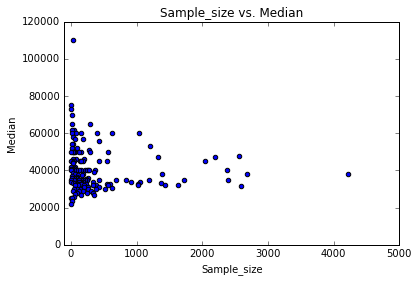

In [5]:
ax = recent_grads.plot(x='Sample_size', y='Median', kind='scatter')
ax.set_title('Sample_size vs. Median')
ax.set_xlim(-100, 5000)

(-0.01, 0.2)

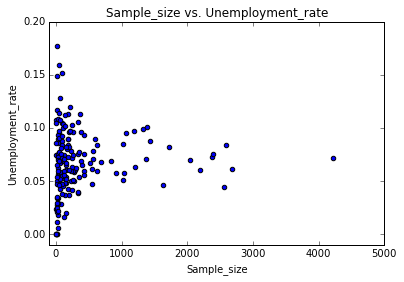

In [6]:
ax = recent_grads.plot(x='Sample_size', y='Unemployment_rate', kind='scatter')
ax.set_title('Sample_size vs. Unemployment_rate')
ax.set_xlim(-100, 5000)
ax.set_ylim(-0.01, 0.2)

(-5000, 300000)

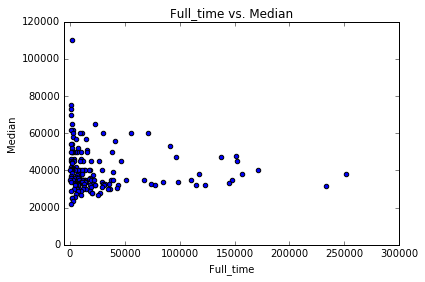

In [7]:
ax = recent_grads.plot(x='Full_time', y='Median', kind='scatter')
ax.set_title('Full_time vs. Median')
ax.set_xlim(-5000,300000)

(-0.01, 0.2)

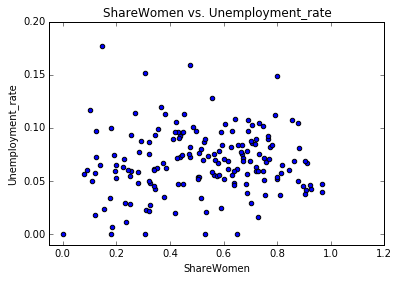

In [8]:
ax = recent_grads.plot(x='ShareWomen', y='Unemployment_rate', kind='scatter')
ax.set_title('ShareWomen vs. Unemployment_rate')
ax.set_xlim(-0.05,1.2)
ax.set_ylim(-0.01, 0.2)

(-5000, 200000)

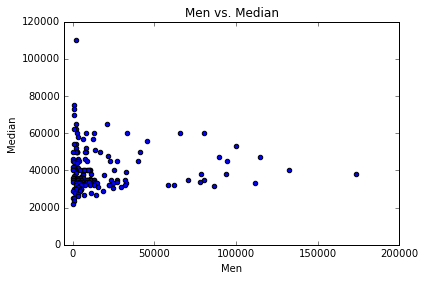

In [9]:
ax = recent_grads.plot(x='Men', y='Median', kind='scatter')
ax.set_title('Men vs. Median')
ax.set_xlim(-5000,200000)

(-10000, 350000)

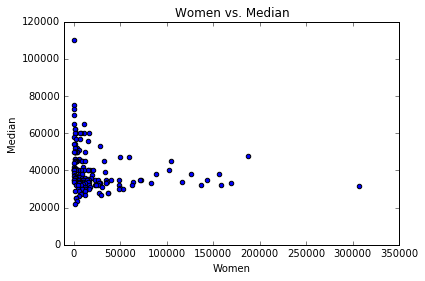

In [10]:
ax = recent_grads.plot(x='Women', y='Median', kind='scatter')
ax.set_title('Women vs. Median')
ax.set_xlim(-10000,350000)

The last 6 figures show that there are no correlation between the variables that each of them show.

(-5000, 400000)

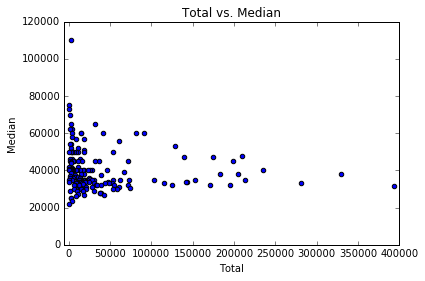

In [11]:
ax = recent_grads.plot(x='Total', y='Median', kind='scatter')
ax.set_title('Total vs. Median')
ax.set_xlim(-5000,400000)

(-0.05, 1.2)

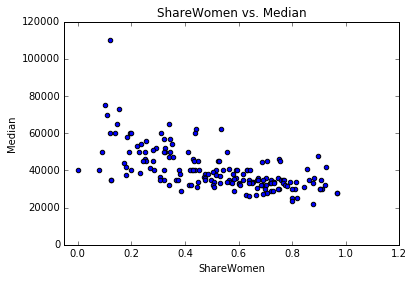

In [12]:
ax = recent_grads.plot(x='ShareWomen', y='Median', kind='scatter')
ax.set_title('ShareWomen vs. Median')
ax.set_xlim(-0.05,1.2)

We use some of these plots to explore and answer the following questions:

- Do students in more popular majors make more money?

The students in popular majors (Total more than 50000) present a median salary similar to the rest of the majors. However, a few of them present higher salaries.

- Do students that majored in subjects that were majority female make more money?

Most of the students that belong to majors that were majority female (ShareWomen higher than 0.6) present low median salaries. However, a few majors achive median salaries between 40000 and 60000. Notice how when the number of share women increases the median salary decreases.

- Is there any link between the number of full-time employees and median salary?

We can see how for the low values of the number of full-time employees  the median salary is high. However, in general there are not relation between the number of full time employees and the median salary.

### Visualizing distributions of variables using histograms
Now, we will generate histograms to explore the distributions of the following columns:
- Sample_size
- Median
- Employed
- Full_time
- ShareWomen
- Unemployment_rate
- Men
- Women

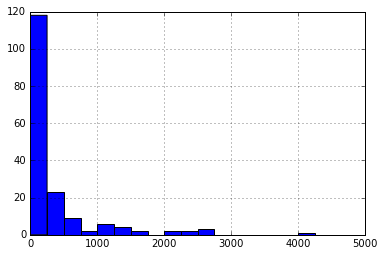

In [13]:
recent_grads['Sample_size'].hist(bins=20, range=(0,5000))

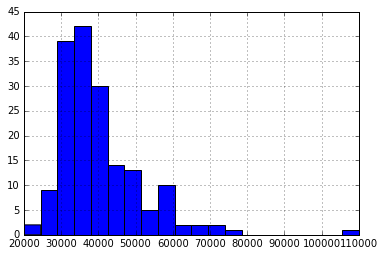

In [14]:
recent_grads['Median'].hist(bins=20, range=(20000,110000))

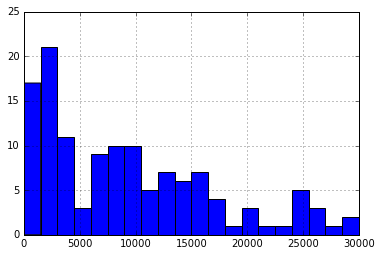

In [15]:
recent_grads['Employed'].hist(bins=20, range=(0,30000))

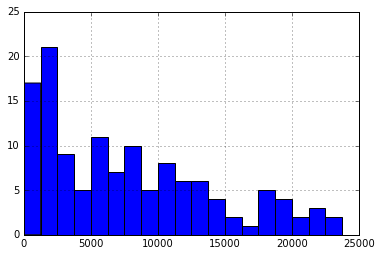

In [16]:
recent_grads['Full_time'].hist(bins=20, range=(0,25000))

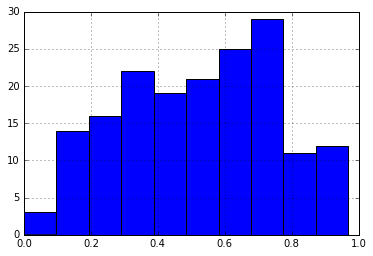

In [17]:
recent_grads['ShareWomen'].hist(bins=10)

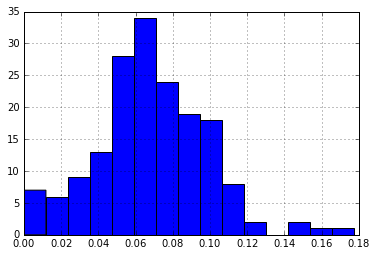

In [18]:
recent_grads['Unemployment_rate'].hist(bins=15 )

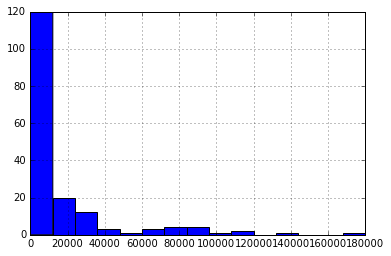

In [19]:
recent_grads['Men'].hist(bins=15, range=(100,180000))

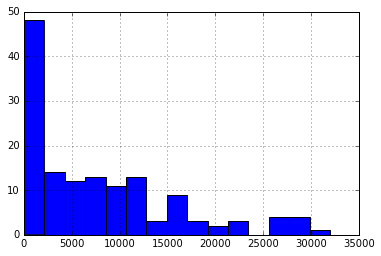

In [20]:
recent_grads['Women'].hist(bins=15, range=(0,32000))


We use some of these plots to explore and answer the following questions:

-- What percent of majors are predominantly male? Predominantly female?

We focus in just the x-values above 0.6 (60%) in the histogram from ShareWomen column, we can see how in about 77 majors more than 60 percentage of the students are women, representing the 44.76% of the total majors and the ones who present more men represent the 55.23%. We have calculated these number, taking into account the following frecuencies for each bar higher than 0.6:
 * bar 0.6-0.7: the frequency is about 25 
 * bar 0.7-0.8: the frecuency is about 29
 * bar 0.8-0.9: the frecuency is about 11
 * bar 0.9-1: the frecuency is about 12

-- What's the most common median salary range?
 
These figures show how the most common median salary range is between 30000 and 45000. 


We have created individual scatter plots to visualize potential relationships between columns and histograms to visualize the distributions of individual columns. A scatter matrix plot combines both scatter plots and histograms into one grid of plots and allows us to explore potential relationships and distributions simultaneously.

In the following, we will create different scatter matrix to explore the data.

### Visualizing potential relationships and distributions simultaneously using scatter matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5f0a2009b0>,
      dtype=object)

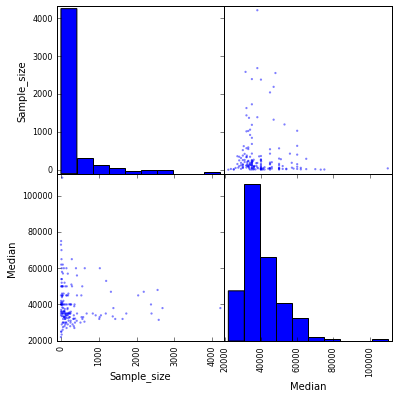

In [33]:
from pandas.plotting import scatter_matrix 
scatter_matrix(recent_grads[['Sample_size', 'Median']], figsize=(6,6))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5f0c701240>,
      dtype=object)

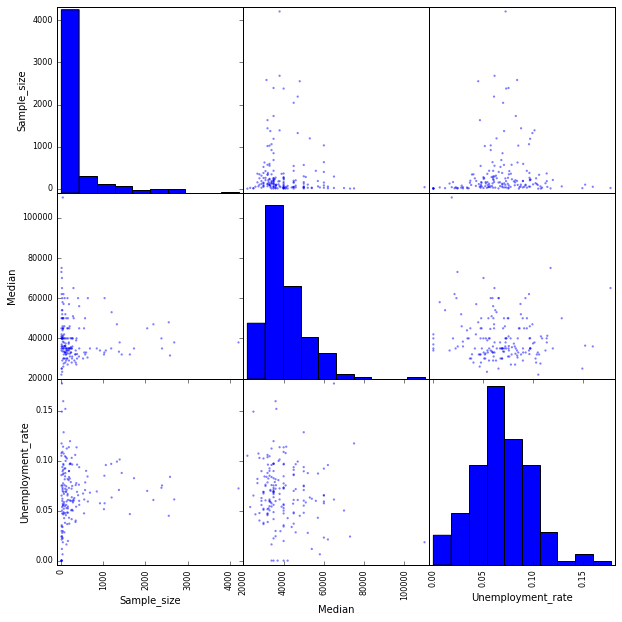

In [22]:
scatter_matrix(recent_grads[['Sample_size', 'Median', 'Unemployment_rate']], figsize=(10,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5f0c3c1a58>,
      dtype=object)

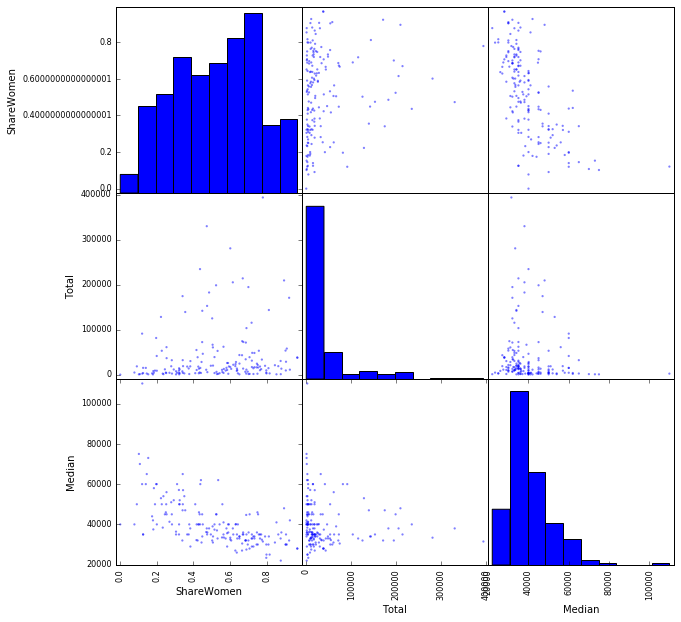

In [23]:
scatter_matrix(recent_grads[['ShareWomen', 'Total', 'Median']], figsize=(10,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5f0a188eb8>,
      dtype=object)

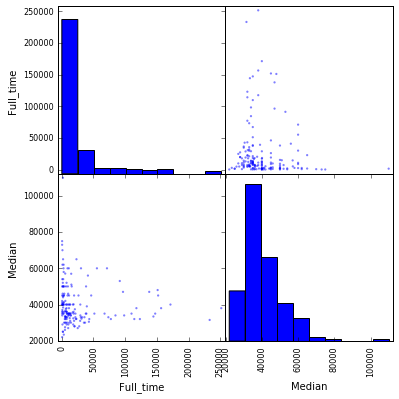

In [34]:
scatter_matrix(recent_grads[['Full_time', 'Median']], figsize=(6,6))

### Visualizing bar plots to compare different variables

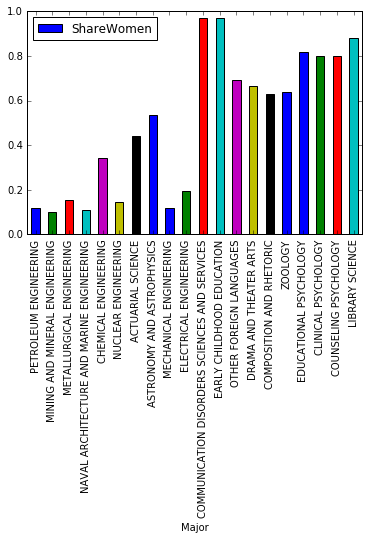

In [25]:
recent_grads[:10].append(recent_grads[-10:]).plot.bar(x='Major', y='ShareWomen')

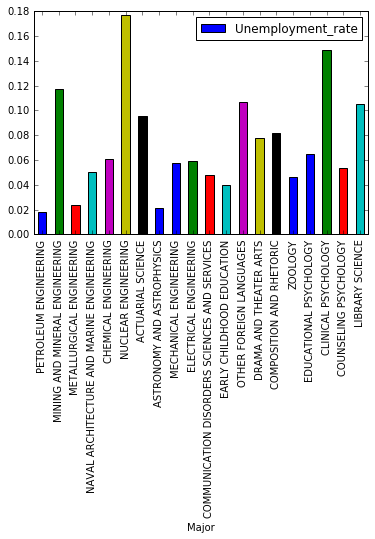

In [26]:
recent_grads[:10].append(recent_grads[-10:]).plot.bar(x='Major', y='Unemployment_rate')

In the following, we compare the number of men with the number of women in each category of majors.

In [27]:
major_categories = recent_grads['Major_category'].unique()
major_categ_total_men_women = []
for major_cat in major_categories:
    sum_men = recent_grads.loc[recent_grads['Major_category'] == major_cat, 'Men'].sum()
    sum_women = recent_grads.loc[recent_grads['Major_category'] == major_cat, 'Women'].sum()
    major_total = (major_cat, sum_men, sum_women)
    major_categ_total_men_women.append(major_total)
men_women_cat_major = pd.DataFrame(major_categ_total_men_women, columns = ['Major_category', 'Total_Men', 'Total_Women'])
men_women_cat_major

,Major_category,Total_Men,Total_Women
0,Engineering,408307.0,129276.0
1,Business,667852.0,634524.0
2,Physical Sciences,95390.0,90089.0
3,Law & Public Policy,91129.0,87978.0
4,Computers & Mathematics,208725.0,90283.0
5,Industrial Arts & Consumer Services,103781.0,126011.0
6,Arts,134390.0,222740.0
7,Health,75517.0,387713.0
8,Social Science,256834.0,273132.0
9,Biology & Life Science,184919.0,268943.0


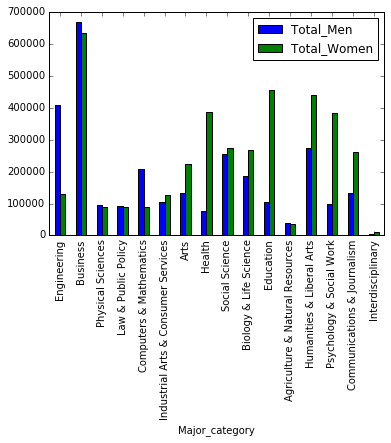

In [28]:
men_women_cat_major[["Major_category", "Total_Men", "Total_Women"]].plot(x="Major_category", kind="bar")

### Visualizing distribution of variables using boxplots

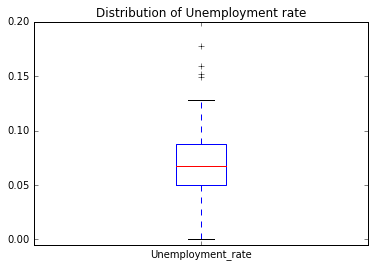

In [29]:
ax = recent_grads['Unemployment_rate'].plot.box()
ax.set_ylim(-0.005,0.2)
ax.set_title('Distribution of Unemployment rate')

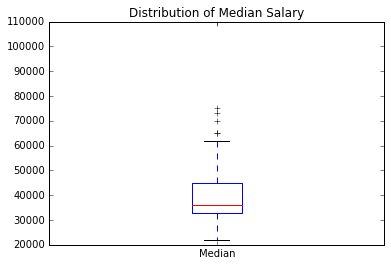

In [30]:
ax = recent_grads['Median'].plot.box()
ax.set_title('Distribution of Median Salary')

### Using hexagonal bin plot to visualize different columns behavior

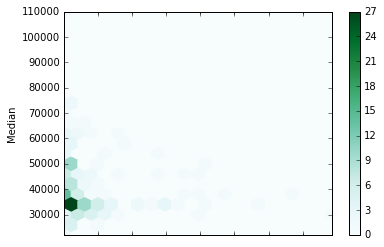

In [31]:
ax = recent_grads.plot.hexbin(x='Total', y='Median', gridsize=20)
ax.set_xlabel('Total')

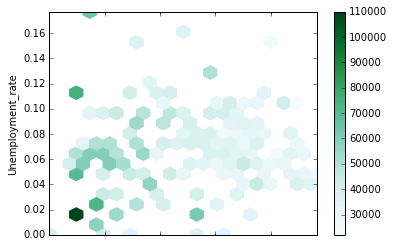

In [32]:
ax = recent_grads.plot.hexbin(x='ShareWomen', y= 'Unemployment_rate', C='Median', gridsize=20)
